Для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси):

1. Доля всех задержек ко всем вылетам
2. Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету
3. Топ 5 направлений, для которых чаще всего происходят задержки
4. В какие времена года чаще всего происходят задержки рейсов
5. Найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
6. Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
7. Найти необычную зависимость количества задержек от имеющихся данных

In [22]:
import pandas as p

# 1. Доля всех задержек ко всем вылетам

data = pd.read_csv('flight_delays.csv', sep = ',')
(a,b) = data.shape # количество строк узнаем их формы таблицы
data  # таблица с нашими данными

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [38]:
df_delays = data[(data['dep_delayed_15min'] == 'Y')] # только строчки с задержками
df_delays

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
36,c-5,c-6,c-5,1728,WN,SAN,SMF,480,Y
49,c-10,c-20,c-5,2312,AQ,OAK,LAS,407,Y
50,c-9,c-9,c-6,1520,YV,SEA,PHX,1107,Y
58,c-9,c-5,c-2,1831,FL,ATL,MSP,906,Y
72,c-6,c-6,c-2,1932,UA,DEN,DTW,1123,Y


In [39]:
(c, b) = delays.shape
print('Доля всех задержек ко всем вылетам: \n', c/a) # эта доля и есть отношение количества строк в таблицах

Доля всех задержек ко всем вылетам: 
 0.19044


Text(0, 0.5, 'Количество задержек')

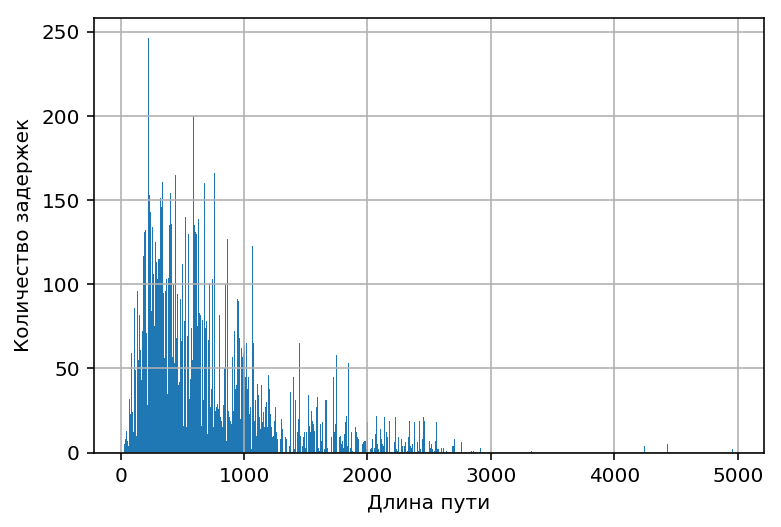

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# 2. Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

delays['Distance'].hist(bins=1000)
plt.xlabel('Длина пути')
plt.ylabel('Количество задержек')

Text(0, 0.5, 'Количество задержек')

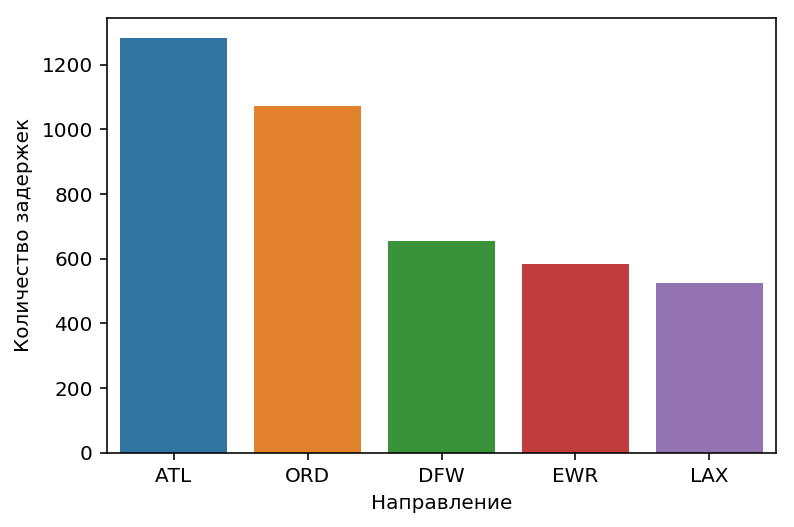

In [67]:
# 3. Топ 5 направлений, для которых чаще всего происходят задержки

sns.countplot(x='Dest', data = df_delays,  order = df_delays.Dest.value_counts().iloc[:5].index);
plt.xlabel('Направление')
plt.ylabel('Количество задержек')